# NLP (Natural Language Processing) и Обучение с учителем (Supervised Learning)
## Классификация текстовых данных

### Данные

Источник: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

Эти данные изначально были получены из библиотеки "Crowdflower's Data for Everyone".

#### Цель: создать алгоритм машинного обучения, который для нового твита будет определять его эмоциональную окраску - позитивный, нейтральный или негативный твит. Такой алгоритм можно будет применять для автоматического чтения твитов и поиска тех твитов, на которые следует обратить внимание службе поддержки клиентов той или иной авиакомпании.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../DATA/airline_tweets.csv")

In [6]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence   
0  570306133677760513           neutral                        1.0000  \
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline   
0            NaN                        NaN  Virgin America  \
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count   
0                    NaN     cairdin                 NaN              0  \
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord   
0                @VirginAmerica What @dhepburn said.         NaN  \
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

<Axes: xlabel='airline', ylabel='count'>

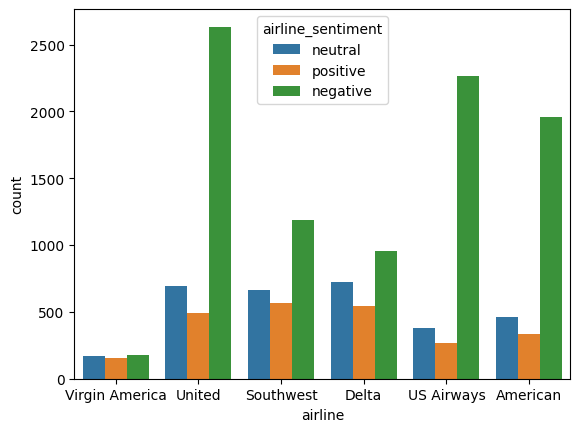

In [7]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')

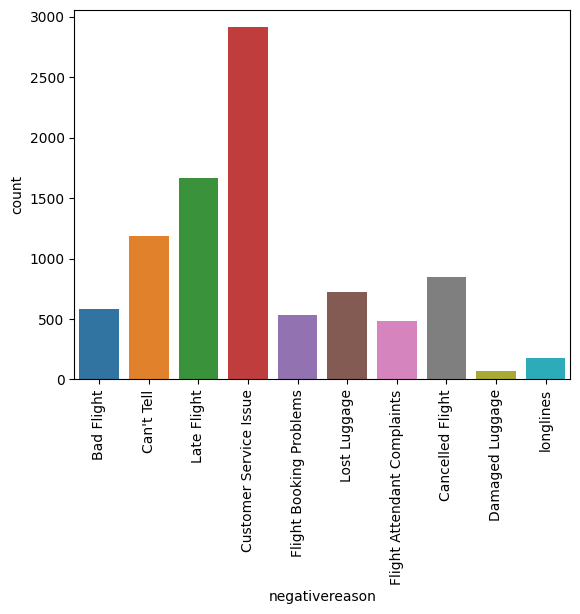

In [8]:
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90);

<Axes: xlabel='airline_sentiment', ylabel='count'>

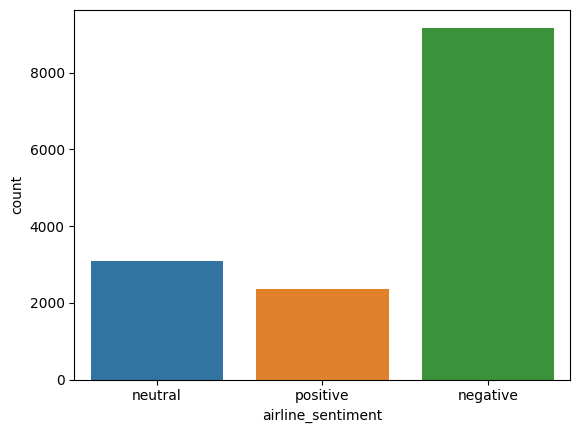

In [9]:
sns.countplot(data=df,x='airline_sentiment')

In [10]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

## Признаки и целевая переменная

In [11]:
data = df[['airline_sentiment','text']]

In [12]:
data.head()

airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...

In [13]:
y = df['airline_sentiment']
X = df['text']

### Разбиение на обучающий и тестовый наборы данных - Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Векторизация

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer(stop_words='english')

In [18]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [19]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [20]:
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

**НЕ ЗАПУСКАЙТЕ .todense() для такой большой разреженной матрицы!**

## Сравнение моделей - Naive Bayes, LogisticRegression, LinearSVC 

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [22]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [23]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

## Оценка работы модели

In [30]:
from sklearn.metrics import plot_confusion_matrix,classification_report

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\User\Desktop\ML_FUL\venv\lib\site-packages\sklearn\metrics\__init__.py)

In [26]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

In [27]:
print("NB MODEL")
report(nb)

NB MODEL


NameError: name 'classification_report' is not defined

In [28]:
print("Logistic Regression")
report(log)

Logistic Regression


NameError: name 'classification_report' is not defined

In [29]:
print('SVC')
report(svc)

SVC


NameError: name 'classification_report' is not defined

### Создание пайплайна для применения к новым твитам

После того, как мы получили хорошо работающую модель, давайте создадим пайплайн, который можно будет применять напрямую к входным текстовым данным (твитам).

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [28]:
pipe.fit(df['text'],df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [29]:
new_tweet = ['good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [30]:
new_tweet = ['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [31]:
new_tweet = ['ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)